In [28]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [29]:
df = pd.read_csv('data/Mars Crater info.csv', dtype=str)

df = df.applymap(lambda x: 'NA' if x == ' ' or pd.isna(x) else x)

df.to_csv('data/Processed_Mars_Crater_info.csv', index=False)

print("결측치 및 공백 전처리 완료")

na_counts_df = df.apply(lambda x: (x == 'NA').sum()).reset_index()
na_counts_df.columns = ['Column', 'NA_Count']

print("각 컬럼의 'NA' 값 개수:")
print(na_counts_df)


C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2852694905.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 'NA' if x == ' ' or pd.isna(x) else x)


결측치 및 공백 전처리 완료
각 컬럼의 'NA' 값 개수:
                   Column  NA_Count
0               CRATER_ID         0
1             CRATER_NAME    383356
2   LATITUDE_CIRCLE_IMAGE         0
3  LONGITUDE_CIRCLE_IMAGE         0
4       DIAM_CIRCLE_IMAGE         0
5    DEPTH_RIMFLOOR_TOPOG         0
6     MORPHOLOGY_EJECTA_1    339718
7     MORPHOLOGY_EJECTA_2    364867
8     MORPHOLOGY_EJECTA_3    383050
9           NUMBER_LAYERS         0


In [30]:
df.head()

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
0,01-000000,NA,84.367,108.746,82.1,.22,NA,NA,NA,0
1,01-000001,Korolev,72.76,164.464,82.02,1.97,Rd/MLERS,HuBL,NA,3
2,01-000002,NA,69.244,-27.24,79.63,.09,NA,NA,NA,0
3,01-000003,NA,70.107,160.575,74.81,.13,NA,NA,NA,0
4,01-000004,NA,77.996,95.617,73.53,.11,NA,NA,NA,0


In [31]:
df.shape

(384343, 10)

In [32]:
df.describe(include='all')

,CRATER_ID,CRATER_NAME,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_IMAGE,DEPTH_RIMFLOOR_TOPOG,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,NUMBER_LAYERS
count,384343,384343,384343,384343,384343,384343,384343,384343,384343,384343
unique,384343,986,129197,231245,6240,296,156,104,29,6
top,01-000000,NA,-23.634,-53.5,1.01,0,NA,NA,NA,0
freq,1,383356,17,9,6298,307529,339718,364867,383050,364612


In [33]:
crater_names = df['CRATER_NAME']
print(crater_names)
un_creater = crater_names.unique()
name_creater_cnt = len(un_creater)

print("creator name count:", name_creater_cnt)

0              NA
1         Korolev
2              NA
3              NA
4              NA
           ...   
384338         NA
384339         NA
384340         NA
384341         NA
384342         NA
Name: CRATER_NAME, Length: 384343, dtype: object
creator name count: 986


NUMBER_LAYERS
0    364612
1     15467
2      3435
3       739
4        85
5         5
Name: count, dtype: int64


C:\Users\JY\AppData\Local\Temp\ipykernel_16228\4107559363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=layer_cnt.index, y=layer_cnt.values, palette='viridis')


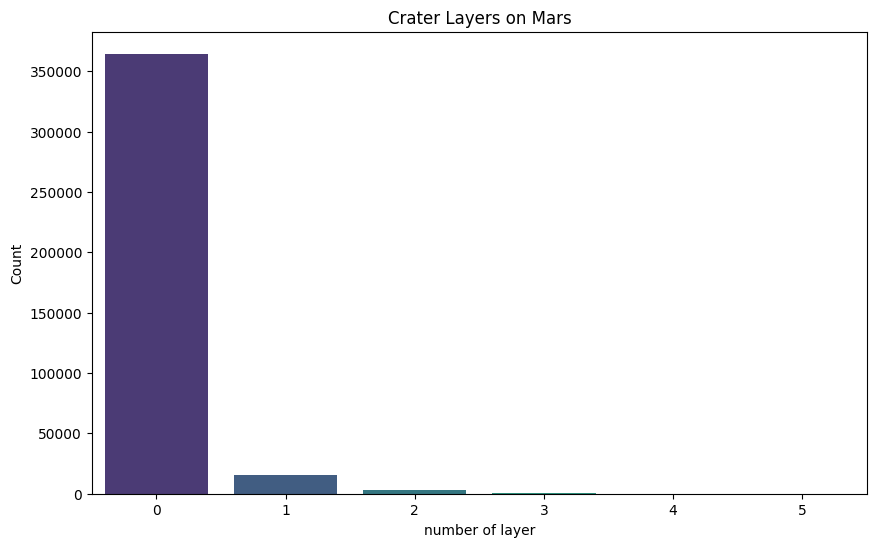

In [34]:
# lAYER 개수

layer_cnt = df['NUMBER_LAYERS'].value_counts().sort_index()
print(layer_cnt)

plt.figure(figsize=(10, 6))
sns.barplot(x=layer_cnt.index, y=layer_cnt.values, palette='viridis')
plt.xlabel('number of layer')
plt.ylabel('Count')
plt.title('Crater Layers on Mars')
plt.show()

<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\m'
<>:29: SyntaxWarning: invalid escape sequence '\s'
C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2584013755.py:29: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal distribution\n($\mu={mean:.2f}$, $\sigma={std:.2f}$)')
C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2584013755.py:29: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal distribution\n($\mu={mean:.2f}$, $\sigma={std:.2f}$)')


Statistics DataFrame:
                           count       mean        std      min     25%  \
LATITUDE_CIRCLE_IMAGE   384343.0  -7.199209  33.608966  -86.700 -30.935   
LONGITUDE_CIRCLE_IMAGE  384343.0  10.128021  96.641592 -179.997 -58.829   
DIAM_CIRCLE_IMAGE       384343.0   3.556686   8.591993    1.000   1.180   
DEPTH_RIMFLOOR_TOPOG    384343.0   0.075838   0.221518   -0.420   0.000   

                           50%      75%       max     variance    std_dev  
LATITUDE_CIRCLE_IMAGE  -10.079  17.2225    85.702  1129.562623  33.608966  
LONGITUDE_CIRCLE_IMAGE  12.740  89.2755   179.997  9339.597376  96.641592  
DIAM_CIRCLE_IMAGE        1.530   2.5500  1164.220    73.822340   8.591993  
DEPTH_RIMFLOOR_TOPOG     0.000   0.0000     4.950     0.049070   0.221518  


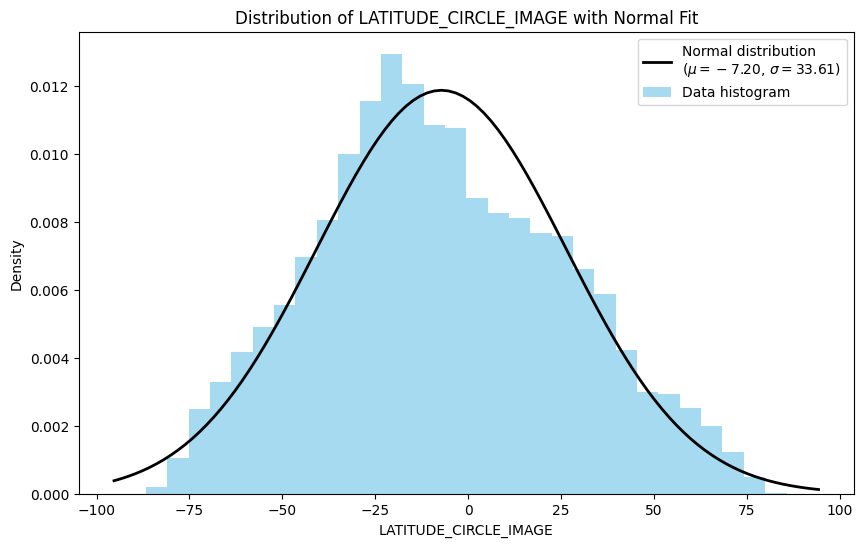

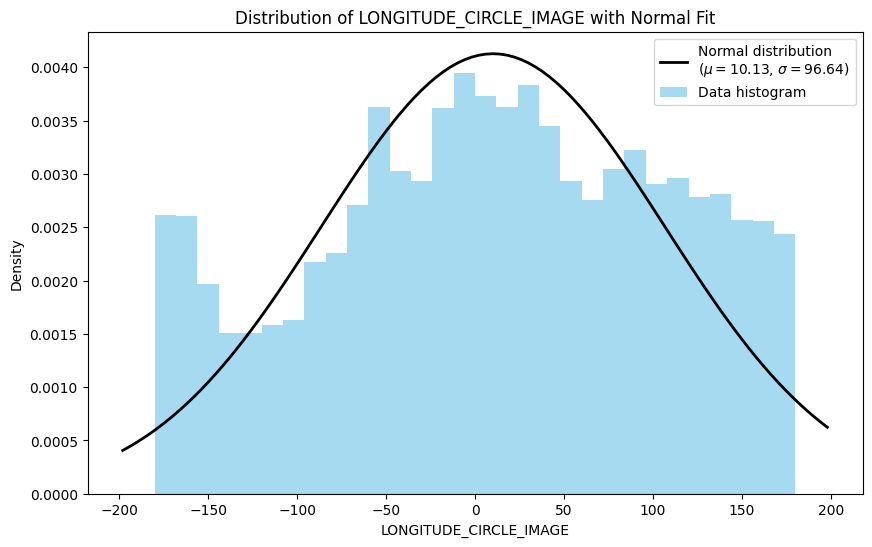

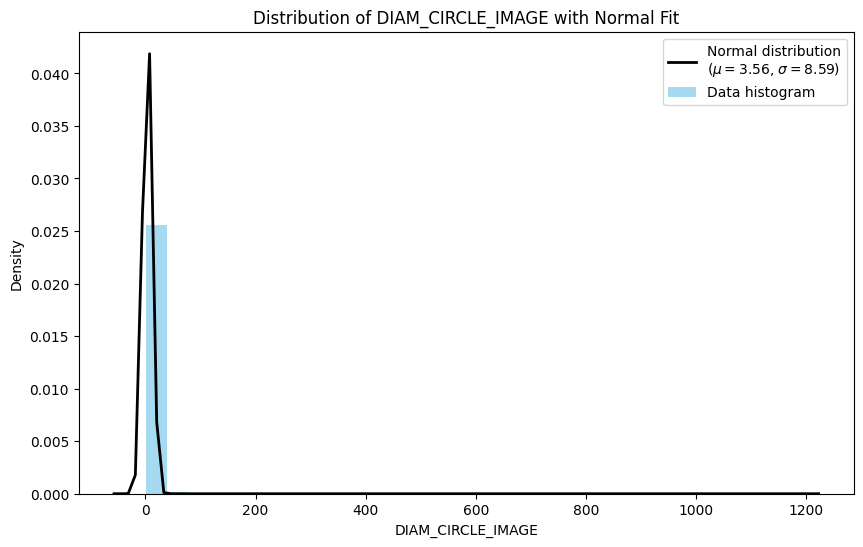

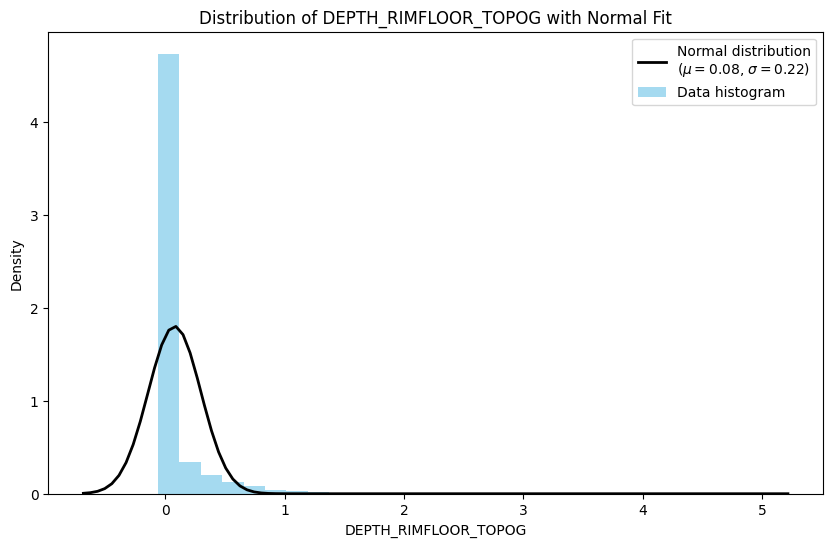

In [35]:
import seaborn as sns
from scipy.stats import norm

# 수치형 컬럼으로 표준편차, 평균, 분산, 정규분포를 계산

numeric_cols = ['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# 계산
stats_df = df[numeric_cols].describe().transpose()
stats_df['variance'] = df[numeric_cols].var()
stats_df['std_dev'] = df[numeric_cols].std()

# df
print("Statistics DataFrame:")
print(stats_df)

# 그래프
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=False, stat="density", linewidth=0, color='skyblue', bins=30, label='Data histogram')
    
    mean = df[col].mean()
    std = df[col].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    
    plt.plot(x, p, 'k', linewidth=2, label=f'Normal distribution\n($\mu={mean:.2f}$, $\sigma={std:.2f}$)')
    
    title = f"Distribution of {col} with Normal Fit"
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    
    plt.show()

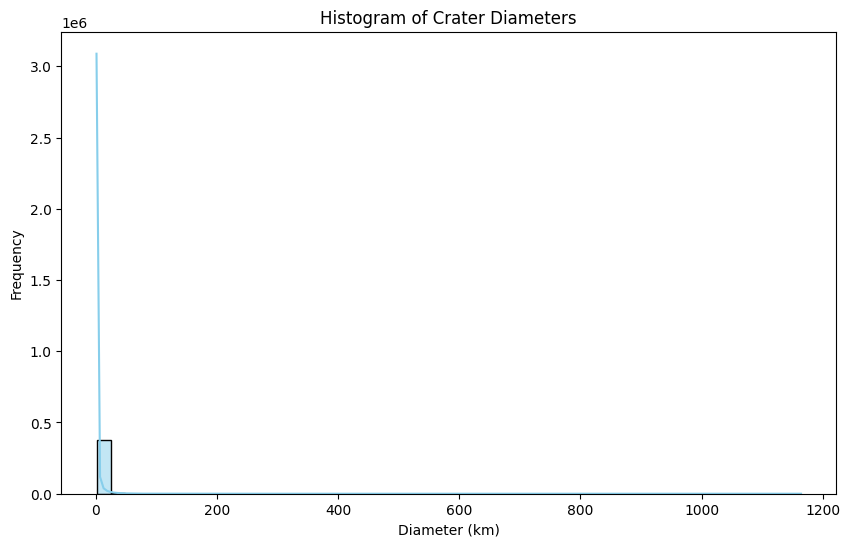

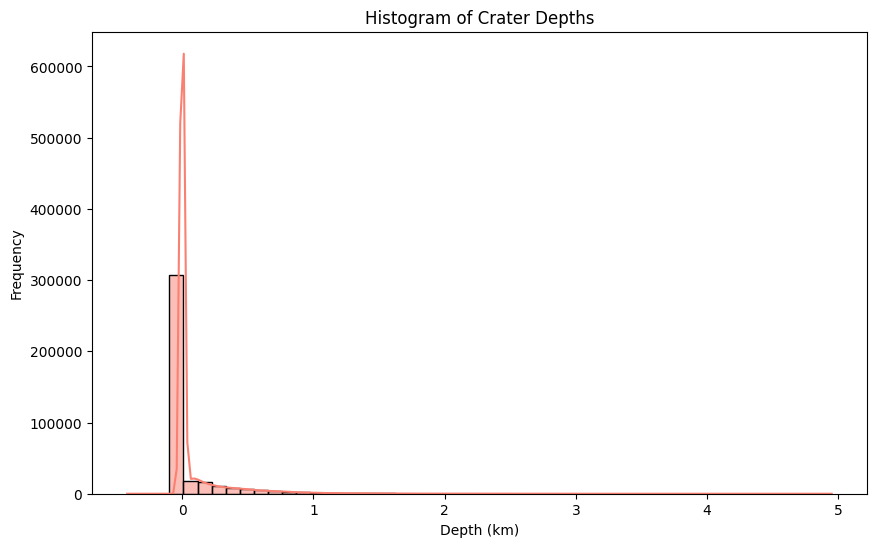

In [36]:
# 직경 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAM_CIRCLE_IMAGE'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Crater Diameters')
plt.xlabel('Diameter (km)')
plt.ylabel('Frequency')
plt.show()

# 깊이 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['DEPTH_RIMFLOOR_TOPOG'], bins=50, kde=True, color='salmon')
plt.title('Histogram of Crater Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

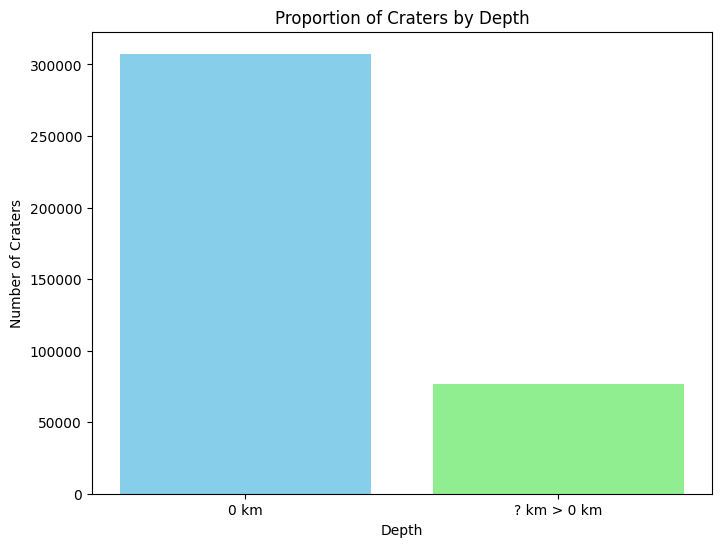

깊이가 0인 분화구의 비율: 80.01%


In [37]:
zero_depth_craters = df[df['DEPTH_RIMFLOOR_TOPOG'] == 0].shape[0]
non_zero_depth_craters = df[df['DEPTH_RIMFLOOR_TOPOG'] != 0].shape[0]
total_craters = df.shape[0]

# Create a DataFrame for the counts
depth_counts = pd.DataFrame({
    'Depth': ['0 km', '? km > 0 km'],
    'Count': [zero_depth_craters, non_zero_depth_craters]
})

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(depth_counts['Depth'], depth_counts['Count'], color=['skyblue', 'lightgreen'])
plt.title('Proportion of Craters by Depth')
plt.xlabel('Depth')
plt.ylabel('Number of Craters')
plt.show()

# Calculate the proportion of craters with depth 0
zero_depth_proportion = zero_depth_craters / total_craters

print(f"깊이가 0인 분화구의 비율: {zero_depth_proportion:.2%}")

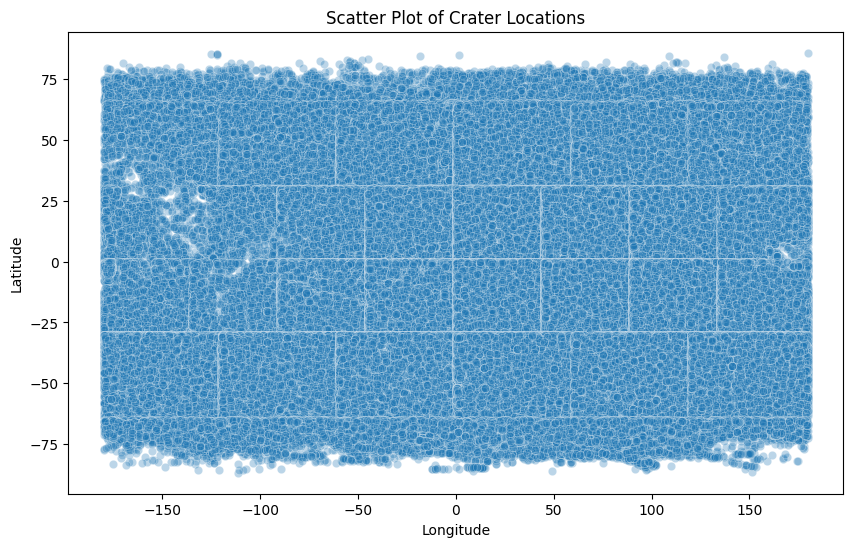

In [38]:
# 위도와 경도가 함께 분포된 형태를 파악

plt.figure(figsize=(10, 6))
sns.scatterplot(x='LONGITUDE_CIRCLE_IMAGE', y='LATITUDE_CIRCLE_IMAGE', data=df, alpha=0.3)
plt.title('Scatter Plot of Crater Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\1371151199.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['LONGITUDE_CIRCLE_IMAGE'], y=df['LATITUDE_CIRCLE_IMAGE'], cmap="Blues", shade=True, bw_adjust=.5)


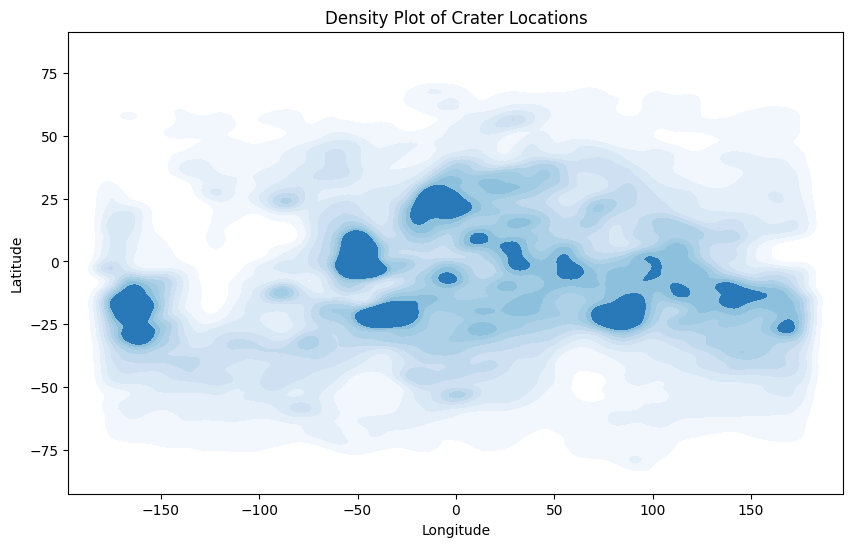

In [13]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['LONGITUDE_CIRCLE_IMAGE'], y=df['LATITUDE_CIRCLE_IMAGE'], cmap="Blues", shade=True, bw_adjust=.5)
plt.title('Density Plot of Crater Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

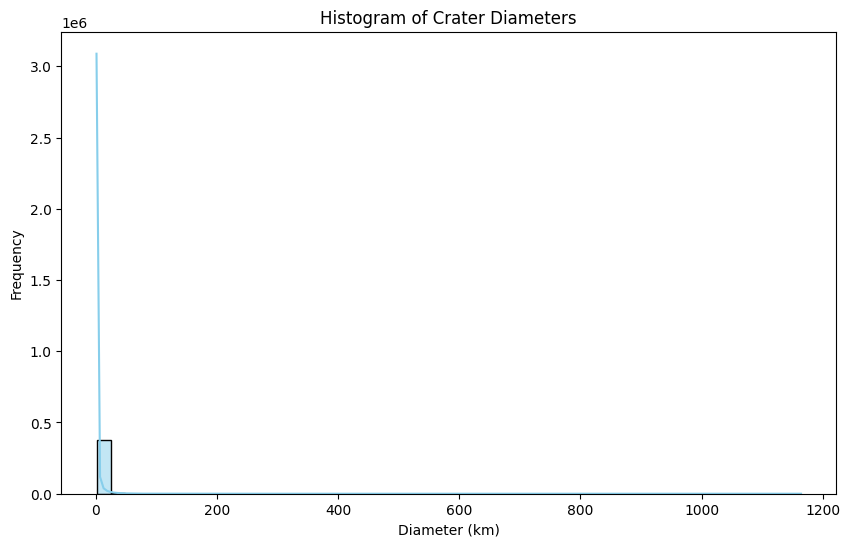

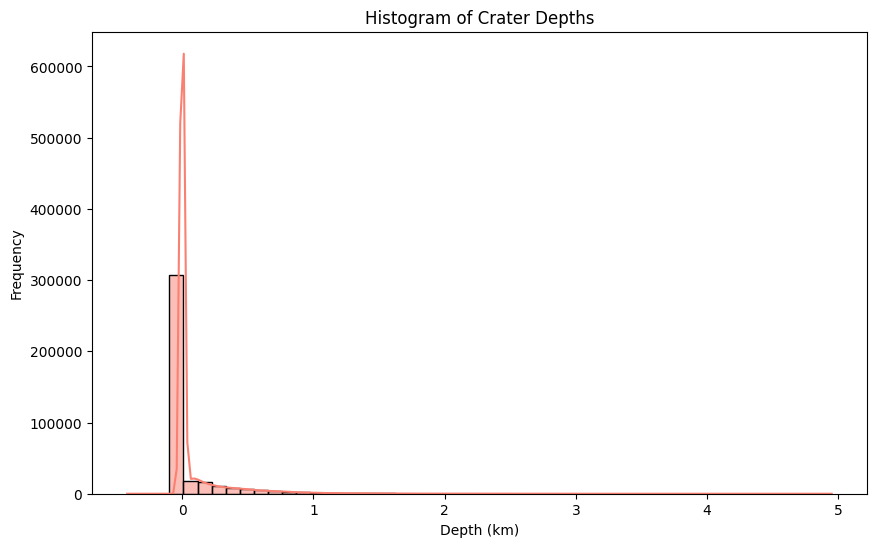

In [14]:
# 직경 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['DIAM_CIRCLE_IMAGE'], bins=50, kde=True, color='skyblue')
plt.title('Histogram of Crater Diameters')
plt.xlabel('Diameter (km)')
plt.ylabel('Frequency')
plt.show()

# 깊이 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(df['DEPTH_RIMFLOOR_TOPOG'], bins=50, kde=True, color='salmon')
plt.title('Histogram of Crater Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

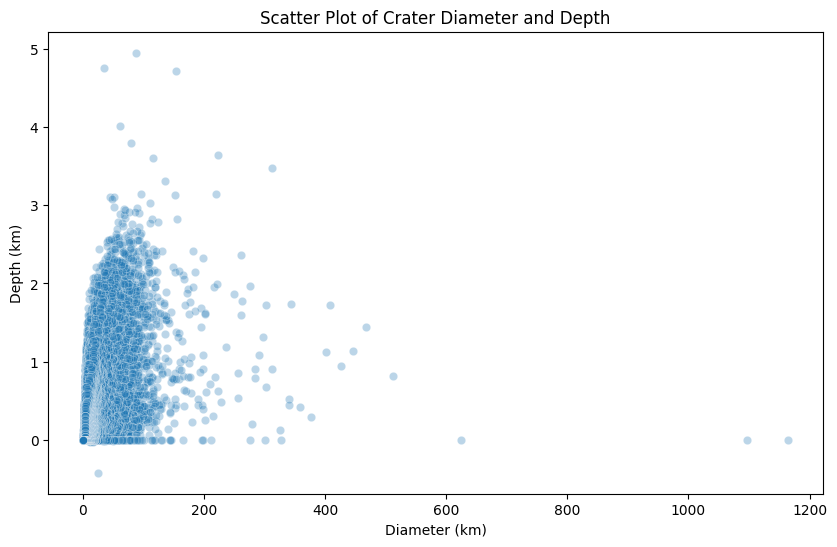

In [15]:
# 깊이와 직경의 상관관계 분석
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIAM_CIRCLE_IMAGE', y='DEPTH_RIMFLOOR_TOPOG', data=df, alpha=0.3)
plt.title('Scatter Plot of Crater Diameter and Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.show()

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2291698519.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df['DIAM_CIRCLE_IMAGE'], y=df['DEPTH_RIMFLOOR_TOPOG'], cmap="Reds", shade=True, bw_adjust=.5)


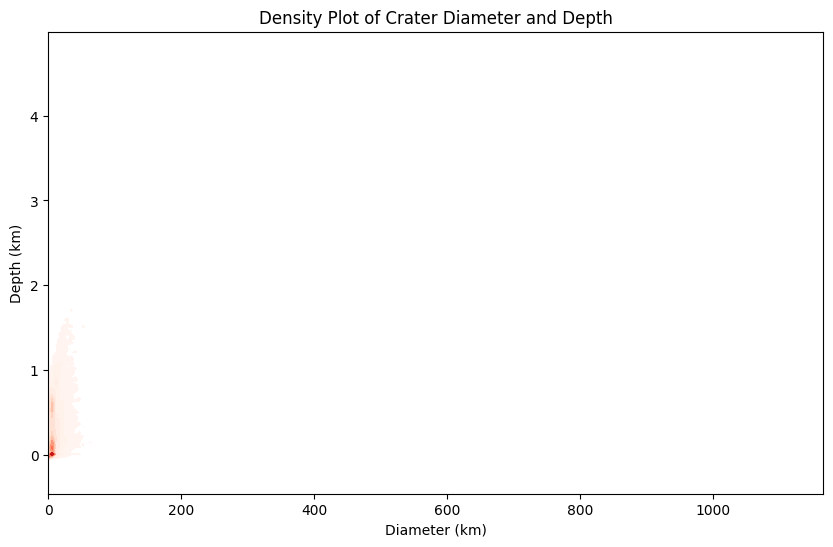

In [16]:
# 깊이와 직경의 밀도 분포 분석
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['DIAM_CIRCLE_IMAGE'], y=df['DEPTH_RIMFLOOR_TOPOG'], cmap="Reds", shade=True, bw_adjust=.5)
plt.title('Density Plot of Crater Diameter and Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.show()

In [39]:
correlation = df['DIAM_CIRCLE_IMAGE'].corr(df['DEPTH_RIMFLOOR_TOPOG'])
print(f"상관계수 (Correlation coefficient): {correlation:.2f}")

상관계수 (Correlation coefficient): 0.59


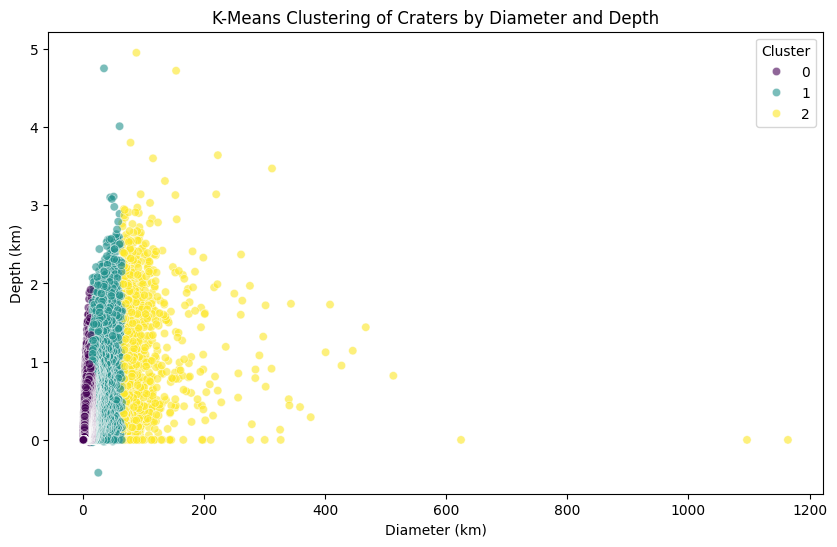

In [40]:
from sklearn.cluster import KMeans
import numpy as np

data_for_clustering = df[['DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']].dropna()
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(data_for_clustering)

data_for_clustering['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DIAM_CIRCLE_IMAGE', y='DEPTH_RIMFLOOR_TOPOG', hue='Cluster', palette='viridis', data=data_for_clustering, alpha=0.6)
plt.title('K-Means Clustering of Craters by Diameter and Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.legend(title='Cluster')
plt.show()

Linear Regression RMSE: 0.17
Linear Regression R-squared (R2): 0.40


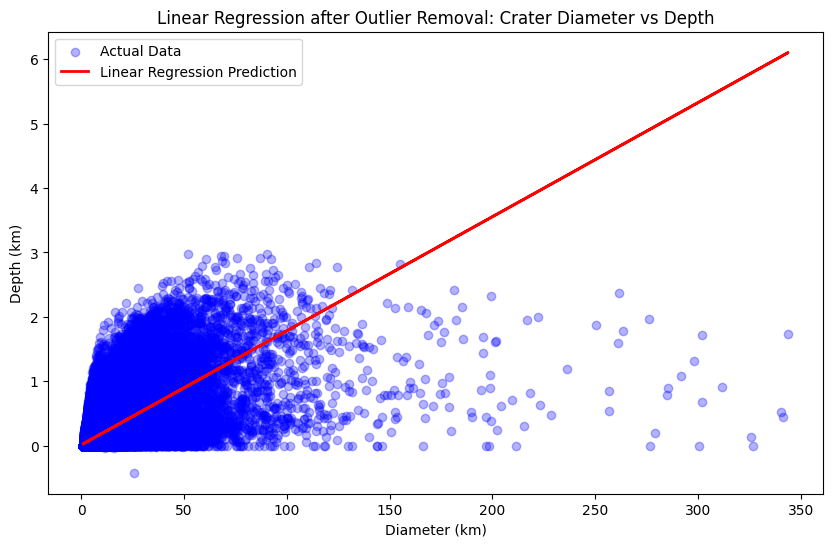

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
## 이상치 식별 및 제거
filtered_df = df[(df['DIAM_CIRCLE_IMAGE'] <= 350) & (df['DEPTH_RIMFLOOR_TOPOG'] <= 3)]

# 선형 회귀 모델 학습
X = filtered_df[['DIAM_CIRCLE_IMAGE']]
y = filtered_df['DEPTH_RIMFLOOR_TOPOG']

linear_reg_model = LinearRegression()
linear_reg_model.fit(X, y)

# 예측
y_pred = linear_reg_model.predict(X)

# 모델 평가
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Linear Regression R-squared (R2): {r2:.2f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Prediction')
plt.title('Linear Regression after Outlier Removal: Crater Diameter vs Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

Polynomial Regression RMSE: 0.15
Polynomial Regression R-squared (R2): 0.53


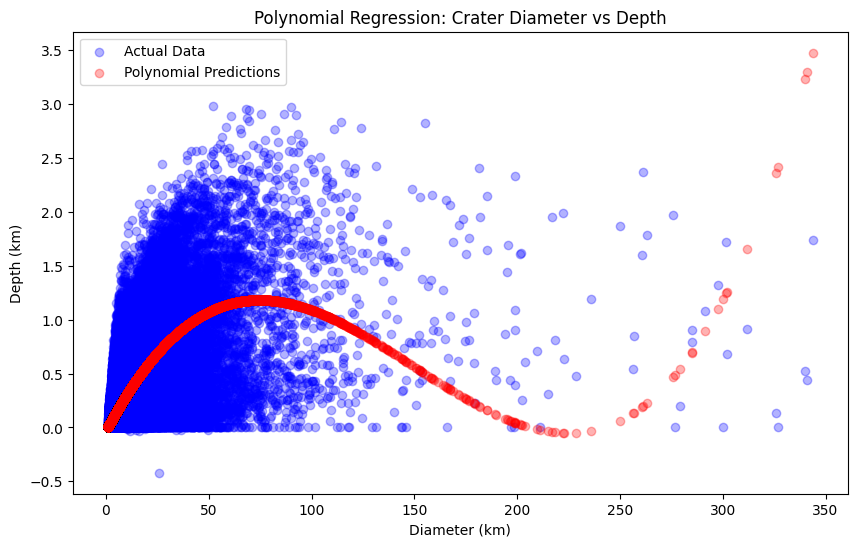

In [42]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# 데이터 전처리
X = filtered_df[['DIAM_CIRCLE_IMAGE']]
y = filtered_df['DEPTH_RIMFLOOR_TOPOG']

# 다항 회귀 모델 적용 (degree=3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# 모델 학습
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# 예측
y_poly_pred = poly_reg_model.predict(X_poly)

# 모델 평가
rmse_poly = np.sqrt(mean_squared_error(y, y_poly_pred))
r2_poly = r2_score(y, y_poly_pred)
print(f"Polynomial Regression RMSE: {rmse_poly:.2f}")
print(f"Polynomial Regression R-squared (R2): {r2_poly:.2f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')
plt.scatter(X, y_poly_pred, color='red', alpha=0.3, label='Polynomial Predictions')
plt.title('Polynomial Regression: Crater Diameter vs Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

Exponential Regression RMSE: 0.36
Exponential Regression R-squared (R2): -1.61


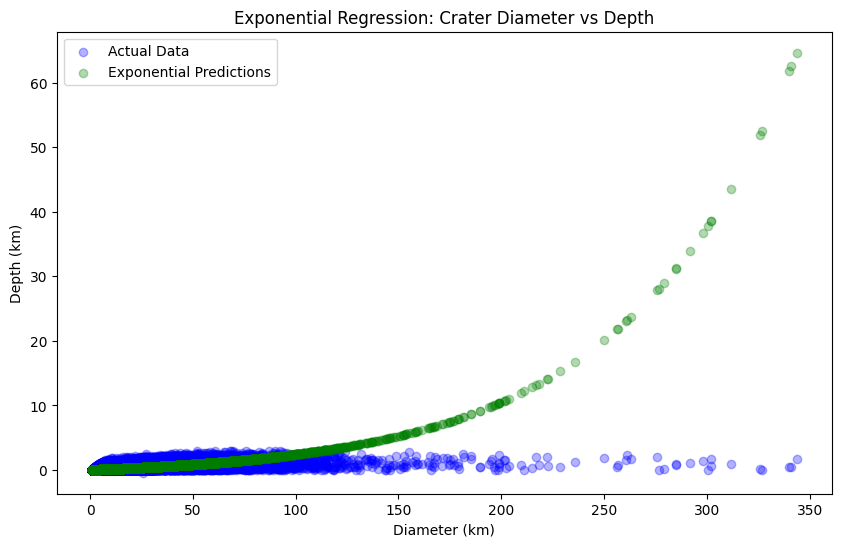

In [43]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 로그 변환 적용
X = filtered_df[['DIAM_CIRCLE_IMAGE']]
y = filtered_df['DEPTH_RIMFLOOR_TOPOG']
log_y = np.log1p(y)  # 로그 변환 적용

# 모델 학습
exp_reg_model = LinearRegression()
exp_reg_model.fit(X, log_y)

# 예측
y_exp_pred = np.expm1(exp_reg_model.predict(X))  # 예측 후 역변환

# 모델 평가
rmse_exp = np.sqrt(mean_squared_error(y, y_exp_pred))
r2_exp = r2_score(y, y_exp_pred)
print(f"Exponential Regression RMSE: {rmse_exp:.2f}")
print(f"Exponential Regression R-squared (R2): {r2_exp:.2f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.3, label='Actual Data')
plt.scatter(X, y_exp_pred, color='green', alpha=0.3, label='Exponential Predictions')
plt.title('Exponential Regression: Crater Diameter vs Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

Log-Transformed Regression RMSE: 0.15
Log-Transformed Regression R-squared (R2): 0.55


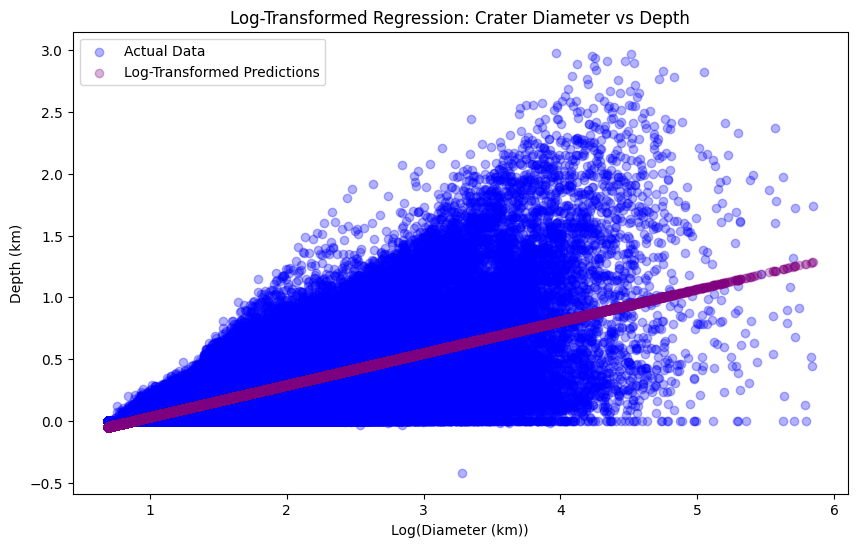

In [44]:
# 데이터 변환
log_X = np.log1p(filtered_df['DIAM_CIRCLE_IMAGE']).values.reshape(-1, 1)
y = filtered_df['DEPTH_RIMFLOOR_TOPOG']

# 모델 학습
log_reg_model = LinearRegression()
log_reg_model.fit(log_X, y)

# 예측
y_log_pred = log_reg_model.predict(log_X)

# 모델 평가
rmse_log = np.sqrt(mean_squared_error(y, y_log_pred))
r2_log = r2_score(y, y_log_pred)
print(f"Log-Transformed Regression RMSE: {rmse_log:.2f}")
print(f"Log-Transformed Regression R-squared (R2): {r2_log:.2f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(log_X, y, color='blue', alpha=0.3, label='Actual Data')
plt.scatter(log_X, y_log_pred, color='purple', alpha=0.3, label='Log-Transformed Predictions')
plt.title('Log-Transformed Regression: Crater Diameter vs Depth')
plt.xlabel('Log(Diameter (km))')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

Multivariable Regression RMSE: 0.17
Multivariable Regression R-squared (R2): 0.40


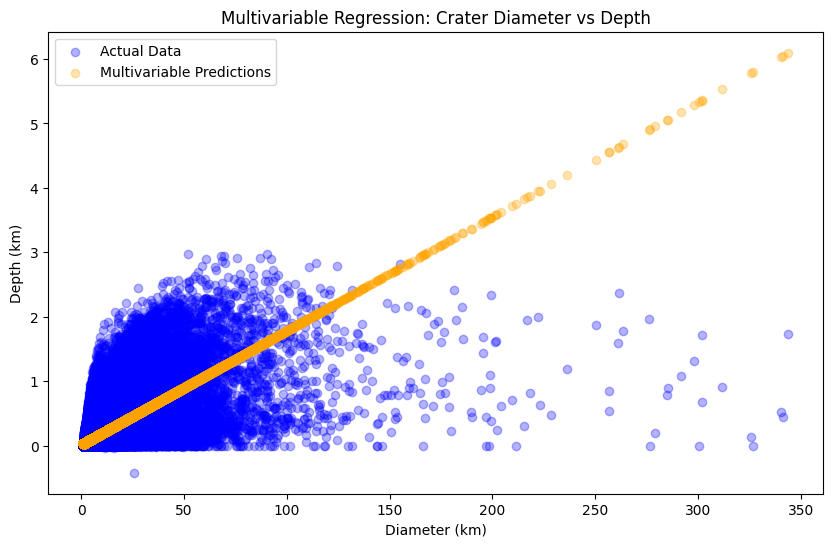

In [45]:
# 다변량 회귀 모델 학습
multi_X = filtered_df[['DIAM_CIRCLE_IMAGE', 'LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE']]
multi_y = filtered_df['DEPTH_RIMFLOOR_TOPOG']

multi_reg_model = LinearRegression()
multi_reg_model.fit(multi_X, multi_y)

# 예측
y_multi_pred = multi_reg_model.predict(multi_X)

# 모델 평가
rmse_multi = np.sqrt(mean_squared_error(multi_y, y_multi_pred))
r2_multi = r2_score(multi_y, y_multi_pred)
print(f"Multivariable Regression RMSE: {rmse_multi:.2f}")
print(f"Multivariable Regression R-squared (R2): {r2_multi:.2f}")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(multi_X['DIAM_CIRCLE_IMAGE'], multi_y, color='blue', alpha=0.3, label='Actual Data')
plt.scatter(multi_X['DIAM_CIRCLE_IMAGE'], y_multi_pred, color='orange', alpha=0.3, label='Multivariable Predictions')
plt.title('Multivariable Regression: Crater Diameter vs Depth')
plt.xlabel('Diameter (km)')
plt.ylabel('Depth (km)')
plt.legend()
plt.show()

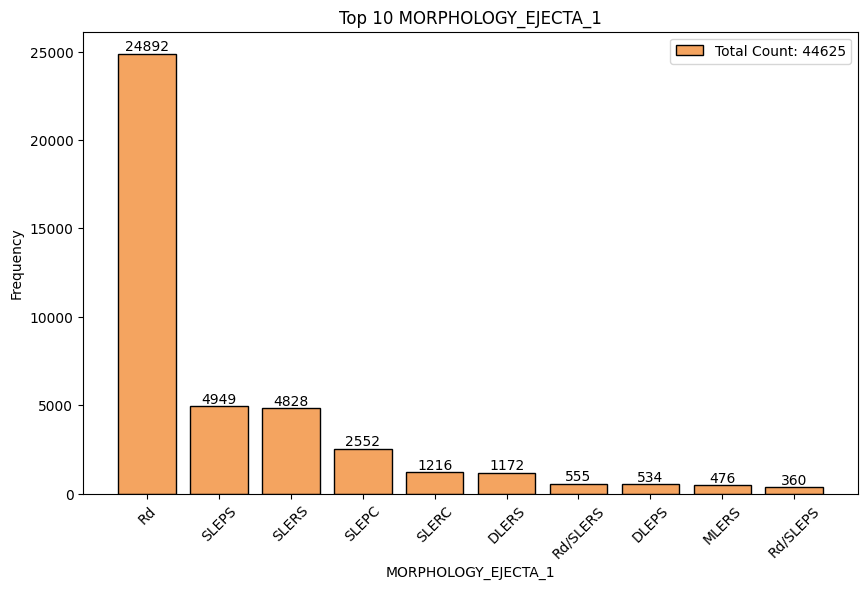

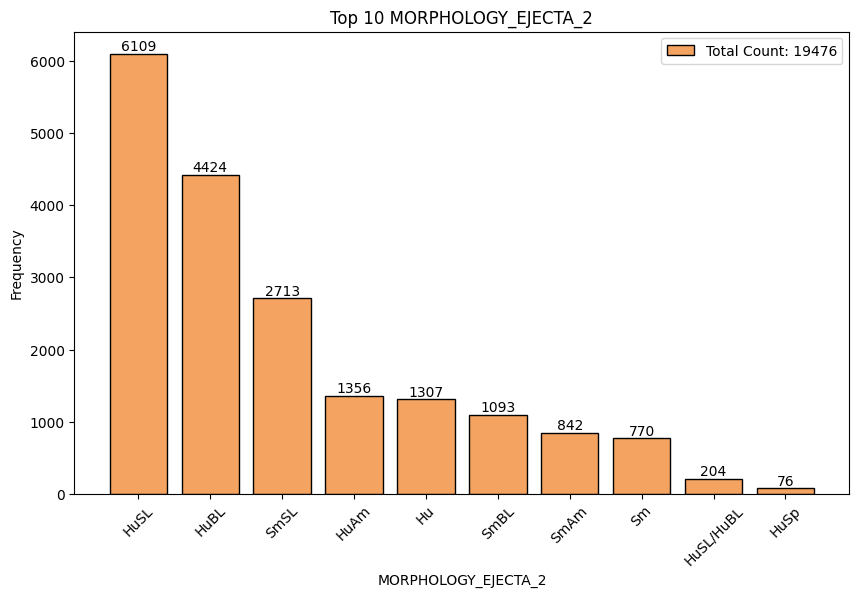

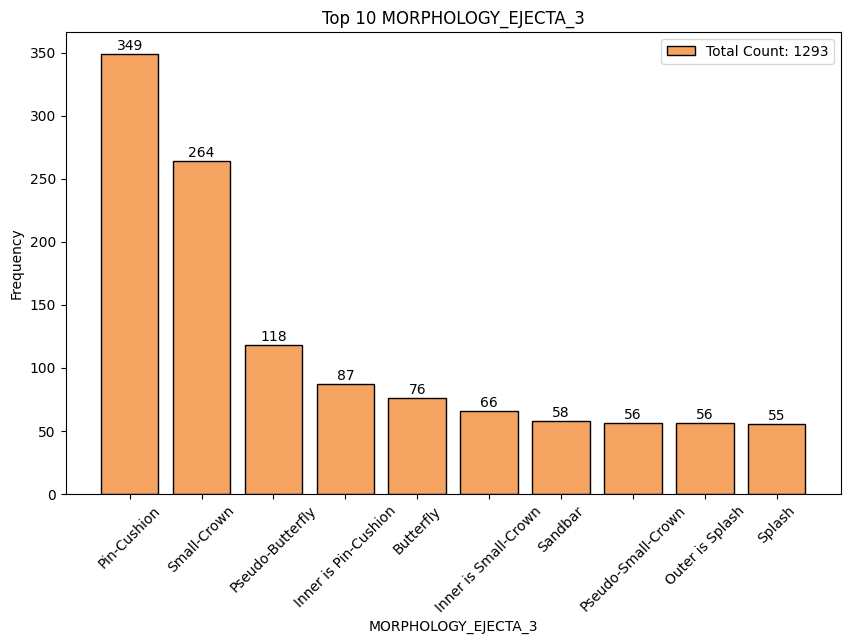

In [46]:
#가장 방출물 형태가 많은 순서
def plot_top_10_morphology(df, column_name):
    filtered_df = df[df[column_name] != 'NA']
    
    value_counts = filtered_df[column_name].value_counts().head(10)
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(value_counts.index, value_counts.values, color='sandybrown', edgecolor='black')
    plt.title(f'Top 10 {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

    plt.legend([f'Total Count: {filtered_df[column_name].count()}'], loc='upper right')
    plt.show()


plot_top_10_morphology(df, 'MORPHOLOGY_EJECTA_1')

plot_top_10_morphology(df, 'MORPHOLOGY_EJECTA_2')

plot_top_10_morphology(df, 'MORPHOLOGY_EJECTA_3')

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2863868379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NUMBER_LAYERS'] = pd.to_numeric(filtered_df['NUMBER_LAYERS'], errors='coerce')


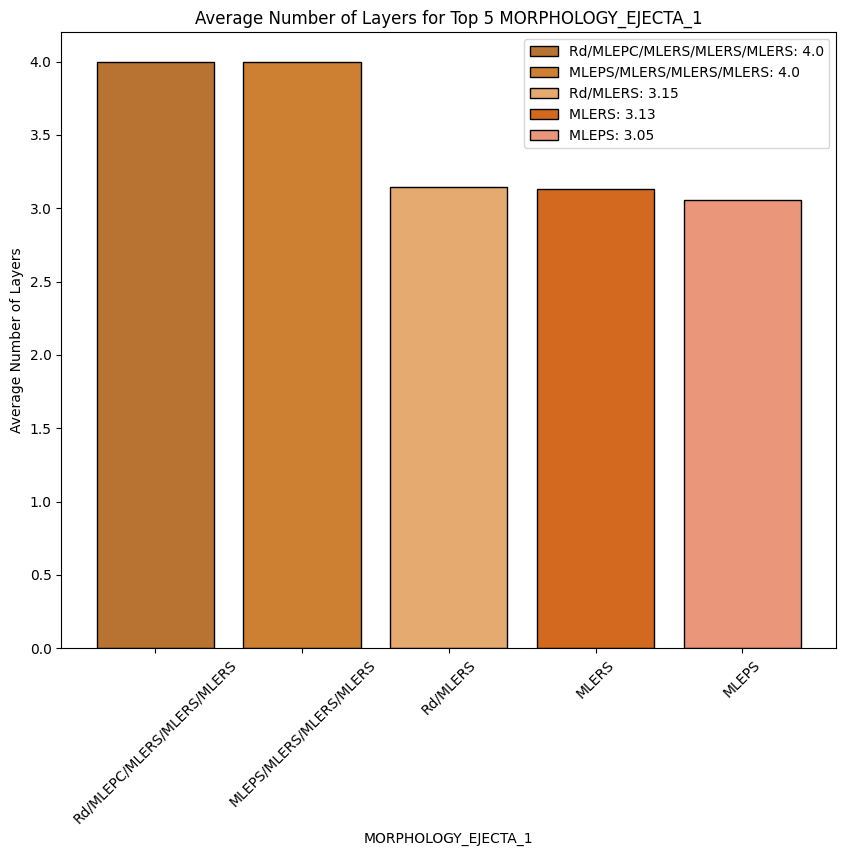

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2863868379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NUMBER_LAYERS'] = pd.to_numeric(filtered_df['NUMBER_LAYERS'], errors='coerce')


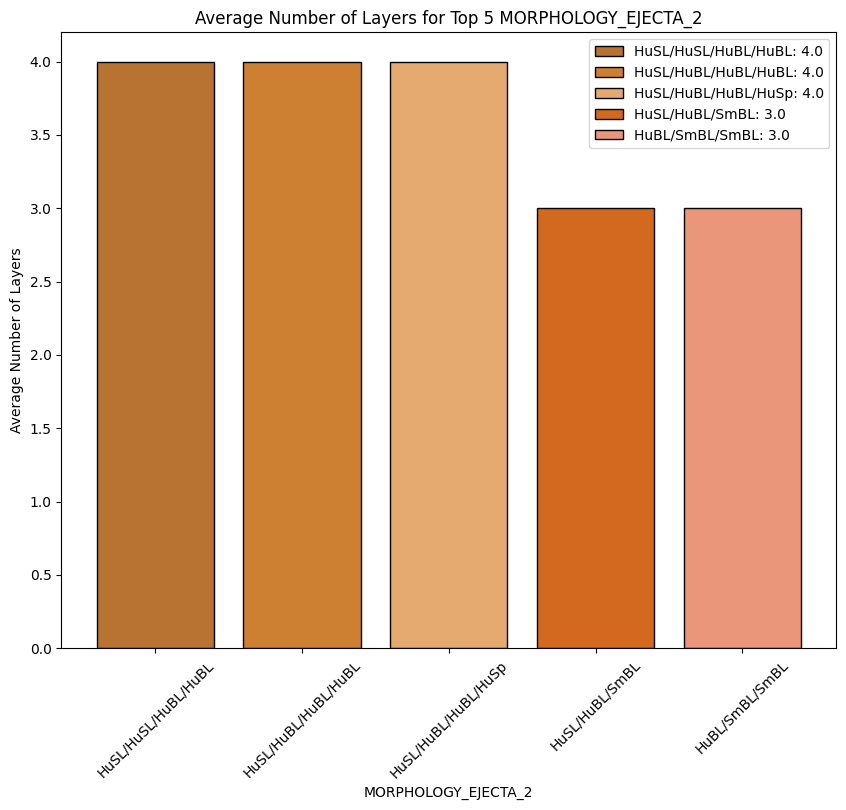

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\2863868379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['NUMBER_LAYERS'] = pd.to_numeric(filtered_df['NUMBER_LAYERS'], errors='coerce')


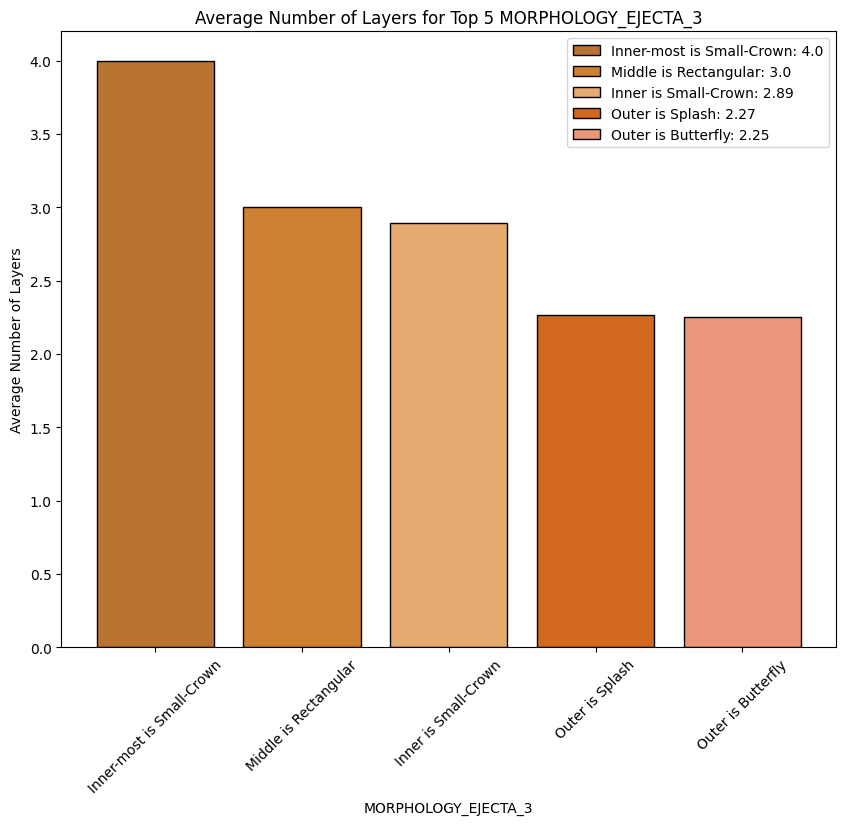

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_ejecta_layers(df, column_name):
    # Filter out rows with 'NA' in the specified column
    filtered_df = df[df[column_name] != 'NA']
    
    # Ensure the NUMBER_LAYERS column is numeric, coercing errors to NaN and then dropping them
    filtered_df['NUMBER_LAYERS'] = pd.to_numeric(filtered_df['NUMBER_LAYERS'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['NUMBER_LAYERS'])
    
    # Group by the specified column and calculate the mean of NUMBER_LAYERS
    ejecta_layers_mean = filtered_df.groupby(column_name)['NUMBER_LAYERS'].mean()
    
    # Sort the results and take the top 5
    ejecta_layers_mean = ejecta_layers_mean.sort_values(ascending=False).head(5)
    
    # Define the colors
    colors = ['#b87333', '#cd7f32', '#e5aa70', '#d2691e', '#e9967a']
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    bars = plt.bar(ejecta_layers_mean.index, ejecta_layers_mean.values, color=colors, edgecolor='black')
    plt.title(f'Average Number of Layers for Top 5 {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Average Number of Layers')
    plt.xticks(rotation=45)
    
    plt.legend(bars, [f'{idx}: {round(val, 2)}' for idx, val in zip(ejecta_layers_mean.index, ejecta_layers_mean.values)], loc='upper right')
    plt.show()

# Analyze the specified columns
analyze_ejecta_layers(df, 'MORPHOLOGY_EJECTA_1')
analyze_ejecta_layers(df, 'MORPHOLOGY_EJECTA_2')
analyze_ejecta_layers(df, 'MORPHOLOGY_EJECTA_3')

In [47]:
import pandas as pd
import folium
from branca.colormap import LinearColormap

# 결측치 및 공백 처리
df = df.applymap(lambda x: 'NA' if x == ' ' or pd.isna(x) else x)

# 숫자형 컬럼의 'NA' 값을 NaN으로 변환하고 숫자로 변환
numeric_columns = ['LATITUDE_CIRCLE_IMAGE', 'LONGITUDE_CIRCLE_IMAGE', 'DIAM_CIRCLE_IMAGE', 'DEPTH_RIMFLOOR_TOPOG']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 'DIAM_CIRCLE_IMAGE' >= 100인 행 필터링
filtered_df = df[(df['CRATER_NAME'] != 'NA') & (df['DIAM_CIRCLE_IMAGE'] >= 100)]

# 컬러맵 설정
colormap = LinearColormap(colors=['#ffffff', '#d9d9d9', '#bdbdbd', '#969696', '#636363', '#252525'],
                          vmin=filtered_df['DIAM_CIRCLE_IMAGE'].min(),
                          vmax=filtered_df['DIAM_CIRCLE_IMAGE'].max())

# 지도 생성
map1 = folium.Map(location=[filtered_df['LATITUDE_CIRCLE_IMAGE'].mean(), filtered_df['LONGITUDE_CIRCLE_IMAGE'].mean()],
                  zoom_start=3,
                  tiles='https://cartocdn-gusc.global.ssl.fastly.net/opmbuilder/api/v1/map/named/opm-mars-basemap-v0-2/all/{z}/{x}/{y}.png',
                  attr='OpenPlanetaryMap')

# 지도에 제목 추가
title_html = '''
             <div style="position: fixed; 
                         top: 10px; left: 50px; width: 400px; height: 50px; 
                         background-color: white; z-index:9999; 
                         font-size:24px; font-weight:bold; 
                         border:2px solid black; 
                         border-radius:10px;
                         box-shadow: 3px 3px 3px rgba(0, 0, 0, 0.5);
                         text-align:center;">
              100km > Crater Map
             </div>
             '''
map1.get_root().html.add_child(folium.Element(title_html))

# 각 분화구에 마커 추가
for idx, row in filtered_df.iterrows():
    html = f"""
    <div style="font-family: Arial; font-size: 14px; color: #333;">
        <h4 style="margin-bottom: 10px;">{row['CRATER_NAME']}</h4>
        <p><strong>Diameter:</strong> {row['DIAM_CIRCLE_IMAGE']} km</p>
        <p><strong>Depth:</strong> {row['DEPTH_RIMFLOOR_TOPOG']:.3f} km</p>
    </div>
    """
    popup = folium.Popup(html, max_width=250)
    icon_size = row['DIAM_CIRCLE_IMAGE'] / 10  # 직경에 따라 크기 설정
    icon = folium.DivIcon(
        html=f"""
        <div style="background-color:{colormap(row['DIAM_CIRCLE_IMAGE'])}; width:{icon_size}px; height:{icon_size}px; border-radius:50%; opacity:0.7; border:1px solid black; transform:translate(-50%, -50%);"></div>
        """,
        icon_size=(icon_size, icon_size)
    )
    folium.Marker(
        location=[row['LATITUDE_CIRCLE_IMAGE'], row['LONGITUDE_CIRCLE_IMAGE']],
        icon=icon,
        popup=popup
    ).add_to(map1)

# 컬러맵을 지도에 추가
colormap.add_to(map1)

# 지도 저장
map1.save('craters_above_100km.html')

C:\Users\JY\AppData\Local\Temp\ipykernel_16228\1163174604.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 'NA' if x == ' ' or pd.isna(x) else x)
